# sustainable_products_dataset

## `1. Import Data`

In [1]:
import pandas as pd 

data = pd.read_csv("/home/uynk/Belgeler/DataSets/sustainable_products_dataset.csv") 

In [2]:
display(data.head())
data.columns

,Product_ID,Product_Name,Category,Material_Type,Manufacturing_Process,Durability,Carbon_Footprint,Energy_Consumption,Water_Usage,Recyclability,...,Functionality_Score,Brand_Value,After_Sales_Service,Consumer_Satisfaction,Is_Optimum,Optimization_Suggestions,Market_Demand,Region,Government_Regulations,Competitor_Benchmark
0,P0001,Bookshelf,Furniture,Wood,Hand-made,7,40.844434,99.883047,157.039745,63.716514,...,8,8,3,6,No,"Reduce CO₂ emissions, Lower price, Improve con...",High,China,5,Similar
1,P0002,Sneakers,Clothing,Composite,Assembly Line,12,47.234872,10.381595,198.481254,65.573336,...,3,7,4,9,Yes,Already optimum,High,EU,3,Better
2,P0003,Moisturizing Cream,Cosmetics,Organic,Assembly Line,7,12.673586,41.875281,190.032680,96.906883,...,8,3,1,4,Yes,Already optimum,High,China,2,Similar
3,P0004,Vegan Protein Bar,Food,Organic,Recycled,2,24.132014,111.891415,115.701564,12.818196,...,7,9,8,5,No,"Reduce CO₂ emissions, Improve recyclability, L...",High,China,2,Better
4,P0005,Cotton T-Shirt,Clothing,Organic,Hand-made,8,21.053900,147.657910,110.825736,22.683180,...,8,8,3,1,No,"Reduce CO₂ emissions, Improve recyclability, L...",High,China,8,Similar


Index(['Product_ID', 'Product_Name', 'Category', 'Material_Type',
       'Manufacturing_Process', 'Durability', 'Carbon_Footprint',
       'Energy_Consumption', 'Water_Usage', 'Recyclability',
       'Biodegradability', 'Sustainable_Materials', 'Waste_Generation',
       'Price', 'Aesthetics_Score', 'Functionality_Score', 'Brand_Value',
       'After_Sales_Service', 'Consumer_Satisfaction', 'Is_Optimum',
       'Optimization_Suggestions', 'Market_Demand', 'Region',
       'Government_Regulations', 'Competitor_Benchmark'],
      dtype='object')

In [3]:
missing_var = data.columns[data.isna().any()].tolist()
missing_var

[]

## `2. Data Cleaning`

In [4]:
data = data.drop(columns=["Product_ID","Product_Name","Optimization_Suggestions"]) 

Çıkartmamızın sebebi, yalnızca tanımlayıcı değişkenler. Ve overfitting i önlemek için gerekli.

In [5]:
data.head(3) 

,Category,Material_Type,Manufacturing_Process,Durability,Carbon_Footprint,Energy_Consumption,Water_Usage,Recyclability,Biodegradability,Sustainable_Materials,...,Aesthetics_Score,Functionality_Score,Brand_Value,After_Sales_Service,Consumer_Satisfaction,Is_Optimum,Market_Demand,Region,Government_Regulations,Competitor_Benchmark
0,Furniture,Wood,Hand-made,7,40.844434,99.883047,157.039745,63.716514,1,15.599452,...,4,8,8,3,6,No,High,China,5,Similar
1,Clothing,Composite,Assembly Line,12,47.234872,10.381595,198.481254,65.573336,1,52.475643,...,10,3,7,4,9,Yes,High,EU,3,Better
2,Cosmetics,Organic,Assembly Line,7,12.673586,41.875281,190.032680,96.906883,1,38.541650,...,7,8,3,1,4,Yes,High,China,2,Similar


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52425 entries, 0 to 52424
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Category                52425 non-null  object 
 1   Material_Type           52425 non-null  object 
 2   Manufacturing_Process   52425 non-null  object 
 3   Durability              52425 non-null  int64  
 4   Carbon_Footprint        52425 non-null  float64
 5   Energy_Consumption      52425 non-null  float64
 6   Water_Usage             52425 non-null  float64
 7   Recyclability           52425 non-null  float64
 8   Biodegradability        52425 non-null  int64  
 9   Sustainable_Materials   52425 non-null  float64
 10  Waste_Generation        52425 non-null  float64
 11  Price                   52425 non-null  float64
 12  Aesthetics_Score        52425 non-null  int64  
 13  Functionality_Score     52425 non-null  int64  
 14  Brand_Value             52425 non-null

## `3. Data Manipulation` 

In [7]:
changings = ["Category","Material_Type","Manufacturing_Process","Durability", # Object değerleri category e çevrilmesinin sebebi sınırlı sayıda tekrar eden stringler olmaları ve en önemlisi obj tipine göre daha az yer kaplaması.
             "Biodegradability","Aesthetics_Score","Functionality_Score",
             "Brand_Value","After_Sales_Service","Consumer_Satisfaction",
             "Is_Optimum","Market_Demand","Region","Government_Regulations",
             "Competitor_Benchmark"] 

for var in changings:
    data[var] = data[var].astype("category")


# Bazı category ama ordinal olan değişkenlerimizi tanımladım.
data["Market_Demand"] = data["Market_Demand"].astype(pd.CategoricalDtype(["Low", "Medium", "High"], ordered=True)) 
data["Competitor_Benchmark"] = data["Competitor_Benchmark"].astype(pd.CategoricalDtype(['Similar', 'Better', 'Worse'], ordered=True)) 

In [8]:
new_data = data.copy() 

Her veri setinin kendine öz bir hikayesi vardır. Veri manipülasyonu sırasında değişken türlerinin değişimi konusunda kesin yargılarda bulunmaktan ziyade insanların istedikleri değişkenleri kolayca seçip değiştirebilecekleri bir class yazmayı amaçladım.

In [6]:
import pandas as pd
from ipywidgets import interact, widgets
from IPython.display import clear_output

class transform():
    def __init__(self, data):
        self.data_dict = data.to_dict(orient="list") # orient parametresi sözlük içerisindeki değişken değerlerini listelemeye yarar.
        self.raw_data = data

class manipulations():
    def __init__(self, new_data):
        self.data_dict = new_data.data_dict
        self.raw_data = new_data.raw_data
        self.success_label = widgets.Label(value="")
        
    def get_col_inf(self, col_name): # değişkenin mini informationları
        clear_output(wait=True)
        display(f"Seçtiğiniz değişken =→ {col_name}") # değişkenin ismi 
        print("ilk 7 değer")
        display(self.data_dict.get(col_name)[:7]) # değişkenin ilk 5 değeri
        print(f"Değişkenin tipi {self.raw_data[col_name].dtypes}")
    
    def change_data_type(self, col_name, new_type):
        try:
            if new_type == "integer":
                self.raw_data[col_name] = self.raw_data[col_name].astype(int)
            elif new_type == "float":
                self.raw_data[col_name] = self.raw_data[col_name].astype(float)
            elif new_type == "string":
                self.raw_data[col_name] = self.raw_data[col_name].astype(str)
            elif new_type == "boolean":
                self.raw_data[col_name] = self.raw_data[col_name].astype(bool)
            elif new_type == "datetime":
                self.raw_data[col_name] = pd.to_datetime(self.raw_data[col_name])
            elif new_type == "category(nominal)":
                self.raw_data[col_name] = self.raw_data[col_name].astype("category") # Category, stringlerin arka planında sayı tutar. Object daha çok yer tutar. 
            elif new_type == "category(ordinal)":
                self.raw_data[col_name] = self.raw_data[col_name].astype(pd.CategoricalDtype(ordered=True)) # Küçükten büyüğe otomatik olarak sıralar.
            
        
            self.success_label.value = f"Success! Your choice: {col_name} is now {new_type}"
            
            print(f"Column '{col_name}' successfully converted to {new_type}.")
        
        except Exception as e:
            print(f"Error converting column '{col_name}' to {new_type}: {e}")
    
    def run_interact(self):  # Interactive interface
        interact(self.get_col_inf, col_name=list(self.raw_data.columns))
    
    def run_type_selector(self): 
        self.col_dropdown = widgets.Dropdown(options = list(self.raw_data.columns),
                         description = "Be Changed")
        
        self.type_dropdown = widgets.Dropdown(options = ["integer","float","factor","string","boolean",
                                                    "datetime","category(nominal)","category(ordinal)"],
                                         description = "Changing to")
        
        self.apply_button = widgets.Button(description = "Apply ✅", button_style = "success")
        self.apply_button.on_click(self.on_apply_clicked) # butona tıklandığında yani apply_button da hangi fonksiyonun çalışacağını Pythona söyler.
        
        self.save_button = widgets.Button(description = "Save CSV 💾", button_style = "info")
        self.save_button.on_click(lambda b: self.save_data())
        
        display(widgets.VBox([self.col_dropdown, self.type_dropdown, self.apply_button, self.success_label, self.save_button])) 
    
    def on_apply_clicked(self, b): # Butona tıklandığında devreye giren aksion kısmıdır. 
        self.change_data_type(self.col_dropdown.value, self.type_dropdown.value)
        
    # VE EN SON SAVE AŞAMA
    
    def save_data(self, filename="new_data.pkl"): 
        try:
            # Yani bir Python nesnesini (örneğin: liste, sözlük, ...) dosyaya kaydedip daha sonra tekrar hafızaya yüklemek için kullanılır.
            self.raw_data.to_pickle(filename) # 
            self.success_label.value = f"saved: {filename}"
            print(f"File {filename} saved successfully")
        except Exception as e:
            self.success_label.value = f"Saved ERROR: {e}"


data1 = transform(data)
manp = manipulations(data1)
manp.run_interact()  
manp.run_type_selector()  

interactive(children=(Dropdown(description='col_name', options=('Category', 'Material_Type', 'Manufacturing_Pr…

In [ ]:
import pandas as pd

new_data = pd.read_pickle("new_data.pkl") 

# Fakat Market_Demand ve Competitior_Benchmark değişkenleri, Bunlar mantıksal bir sıralamaya sahip kelimeler olduğundan, sırayı açıkça belirtmeniz gerekir.
new_data["Market_Demand"] = new_data["Market_Demand"].astype(pd.CategoricalDtype(["Low", "Medium", "High"], ordered=True)) 
new_data["Competitor_Benchmark"] = new_data["Competitor_Benchmark"].astype(pd.CategoricalDtype(['Similar', 'Better', 'Worse'], ordered=True)) 
# Pandas a ordinal olduğunu söyledik bunların


new_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52425 entries, 0 to 52424
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Category                52425 non-null  category
 1   Material_Type           52425 non-null  category
 2   Manufacturing_Process   52425 non-null  category
 3   Durability              52425 non-null  category
 4   Carbon_Footprint        52425 non-null  float64 
 5   Energy_Consumption      52425 non-null  float64 
 6   Water_Usage             52425 non-null  float64 
 7   Recyclability           52425 non-null  float64 
 8   Biodegradability        52425 non-null  category
 9   Sustainable_Materials   52425 non-null  float64 
 10  Waste_Generation        52425 non-null  float64 
 11  Price                   52425 non-null  float64 
 12  Aesthetics_Score        52425 non-null  category
 13  Functionality_Score     52425 non-null  category
 14  Brand_Value           

In [9]:
# categorical data
new_data_obj = new_data.select_dtypes(include=["object","category"])
display(new_data_obj.head(3))

# numeric data
new_data_num = new_data.select_dtypes(exclude=['object', 'category'])
new_data_num.head(3) 

,Category,Material_Type,Manufacturing_Process,Durability,Biodegradability,Aesthetics_Score,Functionality_Score,Brand_Value,After_Sales_Service,Consumer_Satisfaction,Is_Optimum,Market_Demand,Region,Government_Regulations,Competitor_Benchmark
0,Furniture,Wood,Hand-made,7,1,4,8,8,3,6,No,High,China,5,Similar
1,Clothing,Composite,Assembly Line,12,1,10,3,7,4,9,Yes,High,EU,3,Better
2,Cosmetics,Organic,Assembly Line,7,1,7,8,3,1,4,Yes,High,China,2,Similar


,Carbon_Footprint,Energy_Consumption,Water_Usage,Recyclability,Sustainable_Materials,Waste_Generation,Price
0,40.844434,99.883047,157.039745,63.716514,15.599452,2.684425,434.426311
1,47.234872,10.381595,198.481254,65.573336,52.475643,13.526406,152.702279
2,12.673586,41.875281,190.032680,96.906883,38.541650,1.463021,123.137975


## `4. EDA`

Amacım data analyze süreci başındaki ASK adımında şirketin yetkili mercilerine sorduğum soruların analizini yapabilmektir.

`ASK:`
1. Bir ürünün optimum=Yes olmasını sağlayan en önemli 3 faktör nedir?
2. Müşteri memnuniyetini en çok etkileyen sürdürebilirlik metriği hangisidir?
3. `Wide and Deep modeli` ile is_Optimum değişkeni değerlerini tahmin etmeye uygun mu? Bir yandan da veri başka modeller için uygun mu değil mi bunu anlamak için EDA süreci üzerinde inceleyeceğim. 

### `4.1`

**Bir ürünün optimum=Yes olmasını sağlayan en önemli 3 faktör nedir?**

In [10]:
new_data_obj['Is_Optimum'] = new_data_obj['Is_Optimum'].map({'Yes': 1, 'No': 0})

In [11]:
# İstatistiksel olarak en iyi 2 değişkenin Is_Optimum ile olan korelasyonlarına baktım.

correlations = new_data_num.corrwith(new_data_obj["Is_Optimum"]) # corrwith fonksiyonu ile yalnızca belirlediğim değişken ile diğer değişkenler arasındaki korelasyona bakmasını sağlar.
relations = correlations.sort_values()
relations 

Price                   -0.274101
Carbon_Footprint        -0.270720
Waste_Generation        -0.004927
Energy_Consumption      -0.001176
Water_Usage             -0.000654
Sustainable_Materials    0.273467
Recyclability            0.273943
dtype: float64

Geri dönüştürülebilir ve Sürdürebilir malzemeler bir ürünün optimum olup olmaması ile yaklaşık 0.27 oranında doğrusaş ilişkilidir. Price ve Carbon_Footprint de Is_Optimum ile negatif yönlü ilişkilidir. 
En önemli 4 değişken: Price, Carbon_Footprint, Sustainable_Materials, Recyclability

### `4.2`

**Müşteri memnuniyetini en çok etkileyen sürdürebilirlik metriği hangisidir.**

In [12]:
new_data_obj['Consumer_Satisfaction'].corr(new_data_num["Sustainable_Materials"], method='spearman') 

np.float64(-0.003023455820389006)

Ürün hangi sürdürülebilir üründen yapılırsa yapılsın müşteri memnuniyet puanına bir etkisi yok.

In [13]:
new_data_obj["Brand_Value"].corr(new_data_num["Price"], method='spearman') 

np.float64(0.005171117554882881)

Marka değeri yüksek olan ürünler daha yüksek fiyata mı satılıyor?

### `4.3`

In [14]:
# Bütün kategorik değişkenelrin değerlerinin gösterildiği bir bar grafik fonksiyonu oluşturmak. 
import matplotlib.pyplot as plt
import seaborn as sns

bar_graph_list = []

for col in new_data_obj.columns:
    fig, ax = plt.subplots(figsize=(8,3))
    sns.countplot(data=new_data, y=col, orient="y") 
    ax.bar_label(ax.containers[0], fontsize=7)
    ax.set_title(f"{col} Değişkeninin Bar grafiği")
    plt.xticks(rotation=45) 
    bar_graph_list.append(fig)
    
    plt.close(fig)  # Bunu kapatıp açabiliriz.

Veri sentetik işlendiği için kategorik, nominal ve ordinal değişken değerlerinin frekansları hemen hemen aynı.

<Axes: >

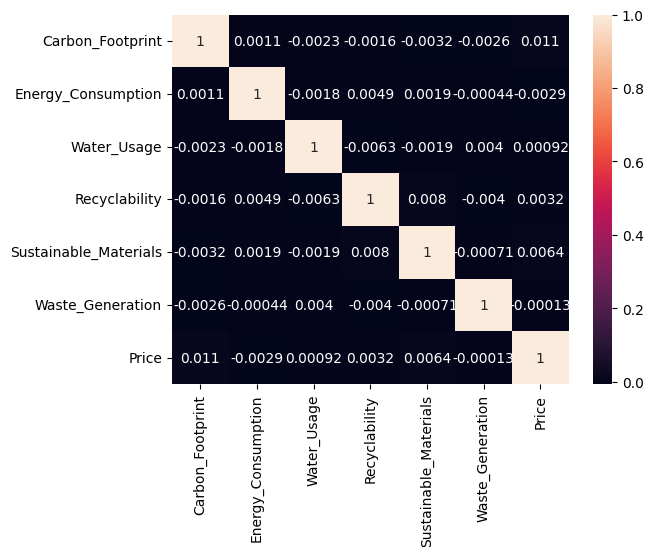

In [15]:
# Numeric değişkenler arasındaki korelasyon
import seaborn as sns

corr_matrix = new_data_num.corr()
sns.heatmap(corr_matrix, annot=True) 

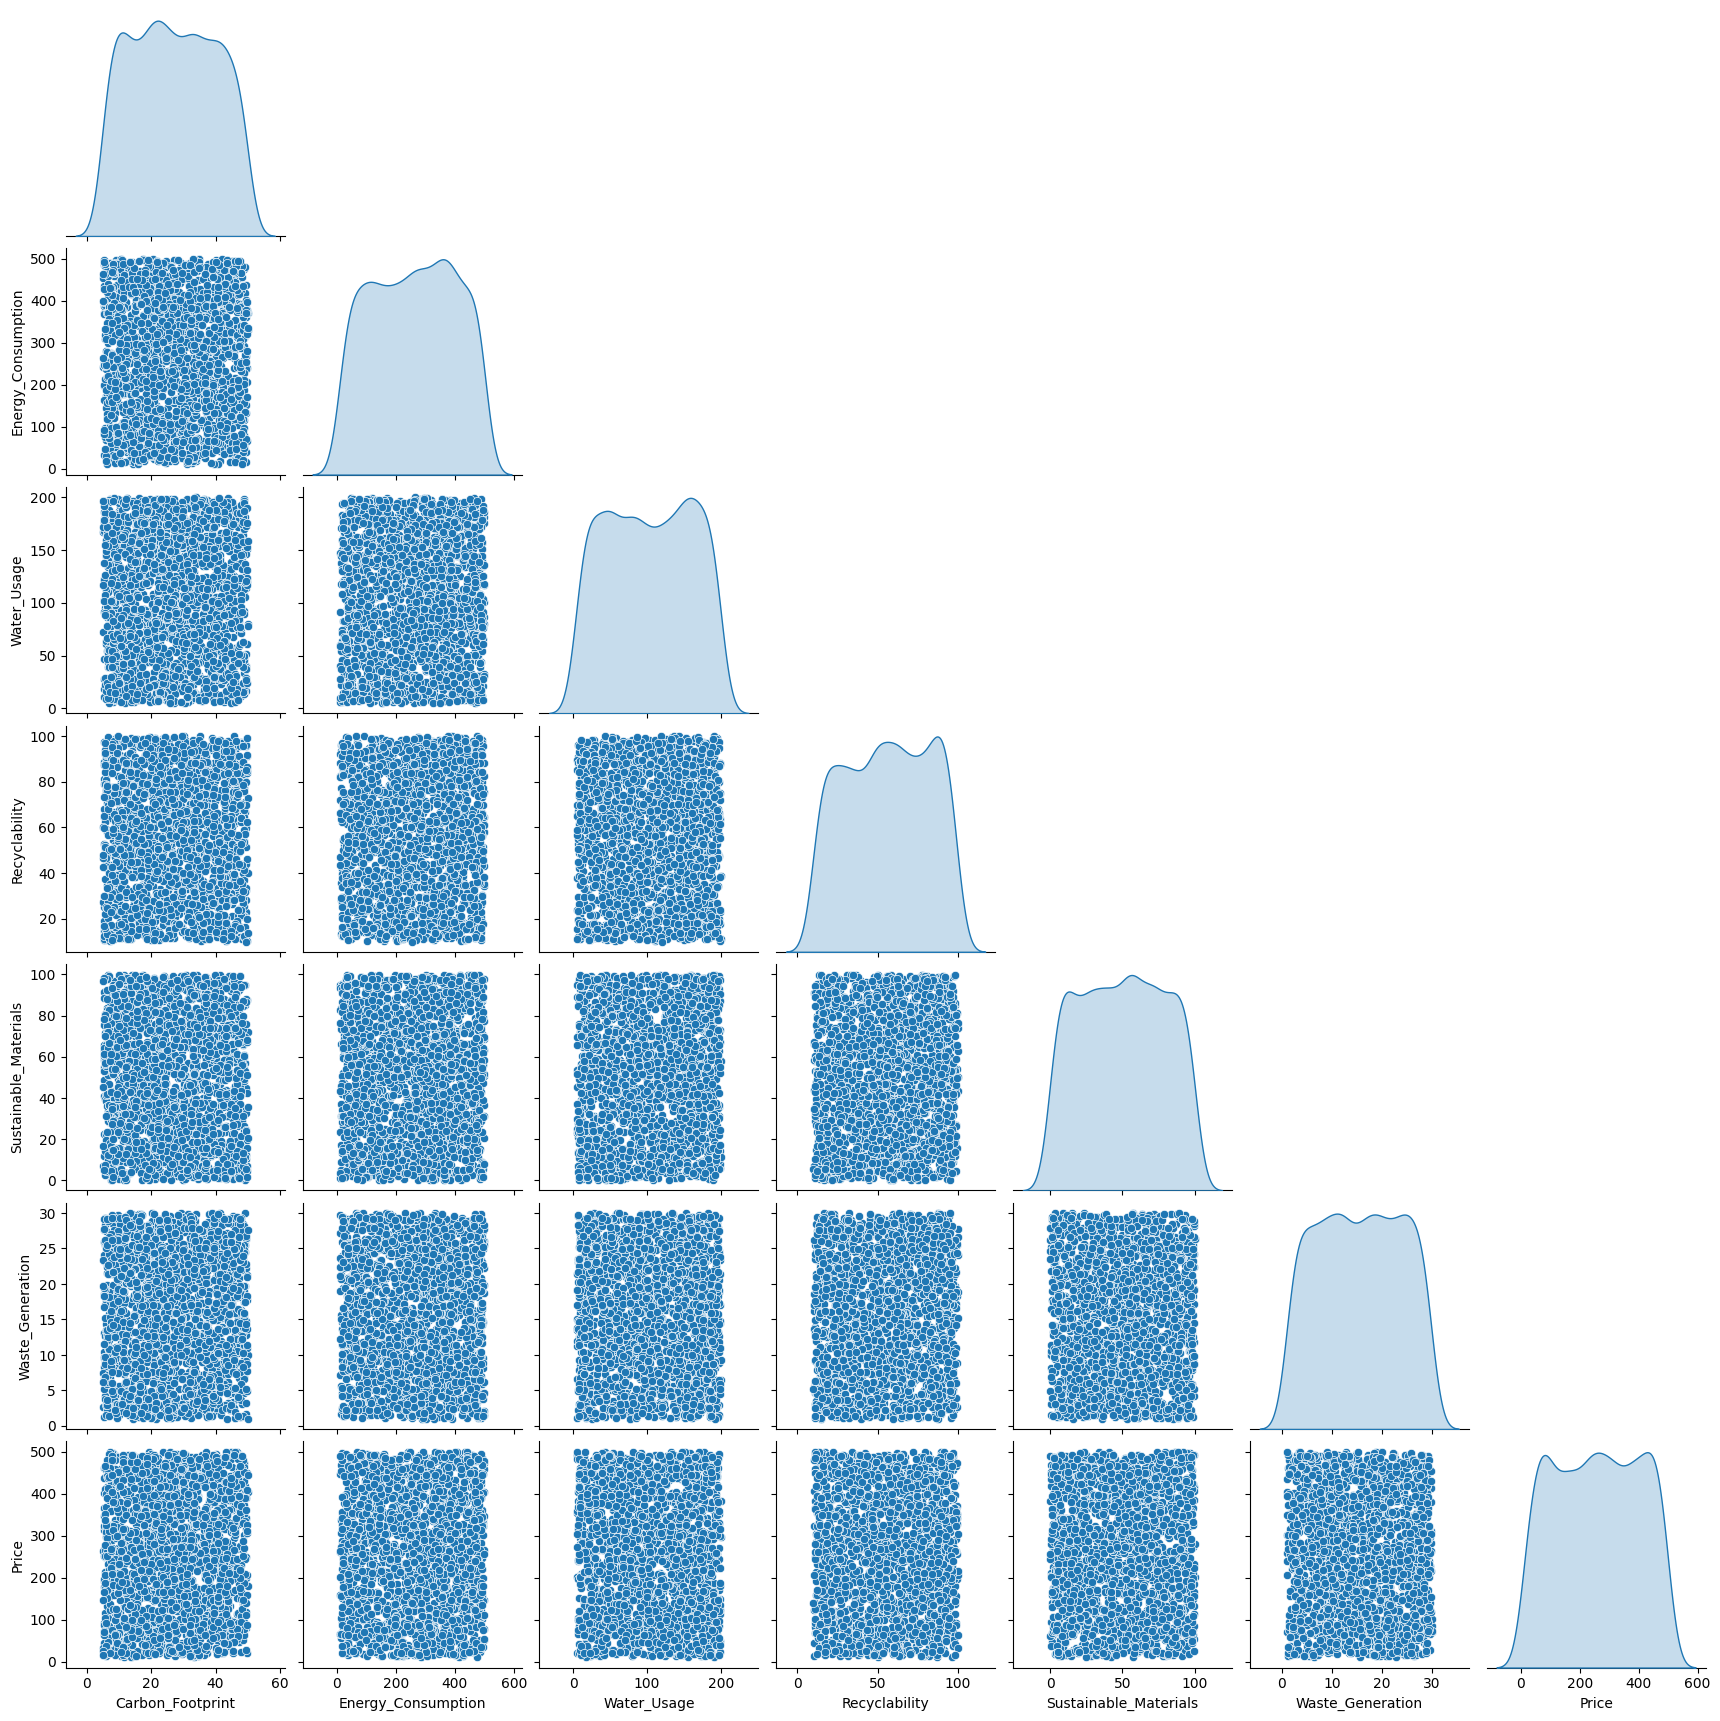

In [16]:
# Sadece rastgele 1000 satırı alıp çizdir
sample_data = new_data_num.sample(n=2000, random_state=42)

sns.pairplot(sample_data, kind='scatter', diag_kind='kde', corner=True)
plt.show() 

In [17]:
from scipy.stats import shapiro 

for col in new_data_num.columns:
    stat, p_value = shapiro(new_data_num[col])
    print(f"Değişken: {col}")
    print(f"p-value {p_value:.5f}") # Hiç birinin normal dağılım ile alakaları yok.

Değişken: Carbon_Footprint
p-value 0.00000
Değişken: Energy_Consumption
p-value 0.00000
Değişken: Water_Usage
p-value 0.00000
Değişken: Recyclability
p-value 0.00000
Değişken: Sustainable_Materials
p-value 0.00000
Değişken: Waste_Generation
p-value 0.00000
Değişken: Price
p-value 0.00000


/home/uynk/Belgeler/Object_Oriented/env2/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 52425.
  res = hypotest_fun_out(*samples, **kwds)


Numeric değişkenlerimiz arasında neredeyse hiç bir ilişki olmamasının yanı sıra dağılımlar da oldukça sentetik dağılmış ve aykırı değerler de yoktur. Bunun anlamı linear, Semi-linear ya da non-linear gibi regresyon modellerinin kullanımı uygun olmaz. Bunun yerine parametrik olmayan ML ya da DL modellerinin kullanılmasının uygun olacağı öngörüsündeyim. Bu durumu anlmak için model içerisinde hem kategorik hem de nümerik değişkenlerin barınabileceği Decision Tree ya da Rain forest modellerini Baseline olarak ele alacağım. 

## `5. Feature Engineering`

String nominal (category) türüne sahip değişkenlerimin hepsine OneHotEncoding işlemi yapacağım. Buna nominal olan Is_Optimum değişkeni de dahil. 

Bu feature engineer aşamasının amacı: Veri setimizin hikayesine göre yukarıda ayarladığımız değişken türleri içerisindeki `category(nominal,ordinal)` değişkenleri scikit-learn anlayabileceği şekilde her değere sayısal bir değer atamaktır. Bunu yapmamızın sebebi ise yukarıdaki işlemlerde category değişken türlerini yalnızca pandas için tanımlamış olmamızdan kaynaklıdır.

**Akıllara gelen soru: Biz R programında category verilerimizi modellerde kullanabilmek için hiç böyle bir yola başvurmuyorduk. Bu değişkenleri factor e çeviriyorduk yalnızca. Pythonda ne değişti.**
**ÇÜNKÜ R İSTATİSTİK TEMELLİ BİR DİL PYTHON DAHA ESNEK BİR DİL.**

In [18]:
# Nominal değişkenlerimizi belirttik tamam ama scikit-learn salağı model eğitme konusunda R'daki rbind gibi değil. Nominal değişkenler için basit bir factor fonksiyonu ile 
# değerlerin arka planına sayı atayıp onun üzerinden işlem yapamıyor illaki encoding yapılacak.

from sklearn.preprocessing import OneHotEncoder
import pandas as pd

Encoded_data = new_data.copy()

variables_to_encoding = ["Category","Material_Type","Manufacturing_Process","Region"] # Bunlar verimizdeki nominal değişkenler. Bunun için bir class yazılacak ki başkaları da faydalanabilsin.
encoded_variables = []

for col in variables_to_encoding:
    encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore", dtype=int)
    encoded_array = encoder.fit_transform(new_data[[col]])
    encoder_names = encoder.get_feature_names_out([col])
    encoded_variables.append(encoder_names)
    
    encoder_data = pd.DataFrame(encoded_array, columns = encoder_names, index = new_data.index)
    Encoded_data = Encoded_data.drop(col, axis=1)
    Encoded_data = pd.concat([Encoded_data, encoder_data], axis=1)

display(Encoded_data.columns)

Index(['Durability', 'Carbon_Footprint', 'Energy_Consumption', 'Water_Usage',
       'Recyclability', 'Biodegradability', 'Sustainable_Materials',
       'Waste_Generation', 'Price', 'Aesthetics_Score', 'Functionality_Score',
       'Brand_Value', 'After_Sales_Service', 'Consumer_Satisfaction',
       'Is_Optimum', 'Market_Demand', 'Government_Regulations',
       'Competitor_Benchmark', 'Category_Clothing', 'Category_Cosmetics',
       'Category_Electronics', 'Category_Food', 'Category_Furniture',
       'Material_Type_Composite', 'Material_Type_Glass', 'Material_Type_Metal',
       'Material_Type_Organic', 'Material_Type_Plastic', 'Material_Type_Wood',
       'Manufacturing_Process_Assembly Line',
       'Manufacturing_Process_Hand-made',
       'Manufacturing_Process_Injection Molding',
       'Manufacturing_Process_Recycled', 'Region_China', 'Region_EU',
       'Region_India', 'Region_US'],
      dtype='object')

In [19]:
Encoded_data["Is_Optimum"] = Encoded_data["Is_Optimum"].map({"Yes":1,"No":0}) 

In [20]:
# Yukarıda pandas a sıralamayı Category=Ordinal ile öğrettiğimiz gibi bu sefer de scikit learn e değişkenin ordinal olduğunu öğretiyoruz.

Encoded_data["Market_Demand"] = Encoded_data["Market_Demand"].cat.codes # Pandas'a sıralamasını öğrettiğimiz değişkenimizi bu komut ile scikit-learn e de öğretiyoruz.
Encoded_data["Competitor_Benchmark"] = Encoded_data["Competitor_Benchmark"].cat.codes # Bu ikisi ordinal değişkenlerimizdi unutma. 

### `Train Test Split`

In [21]:
from sklearn.model_selection import train_test_split 

train_data, test_data = train_test_split(Encoded_data, test_size=0.20, random_state=42) 
X_train = train_data.drop(["Is_Optimum"], axis=1)
y_train = train_data["Is_Optimum"]

X_test = test_data.drop(["Is_Optimum"], axis=1)
y_test = test_data["Is_Optimum"]

### `Baseline` (Decision Tree)

In [22]:
# Desicion Tree şeffaf kutu bir modeldir.

from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=3) # Overfitting i engellemek için. Eğer 3 olarak belirtmezsek her satırı doğru sınıflandırana kadar dallanmaya devam eder.
tree_clf.fit(X_train, y_train) 
y_train_pred = tree_clf.predict(X_train) # train veri seti ile eğitilmiş modelimiz train veri seti y tahmin değerleri 

In [23]:
importances = tree_clf.feature_importances_ # feature_importances_ , bu model eğitildikten sonra modele, bu tahmini yaparken öğrenme aşamasında en çok kimlerden kopya çektin diye sorulur.
feature_imp = pd.Series(importances, index=X_train.columns).sort_values(ascending=False) 

In [24]:
print(feature_imp[0:6]) # Decision Tree model öğrenme aşamasında en önemli rolü oynayan değişkenler. 

Price                    0.293548
Recyclability            0.233097
Sustainable_Materials    0.201224
Consumer_Satisfaction    0.140591
Carbon_Footprint         0.131541
Water_Usage              0.000000
dtype: float64


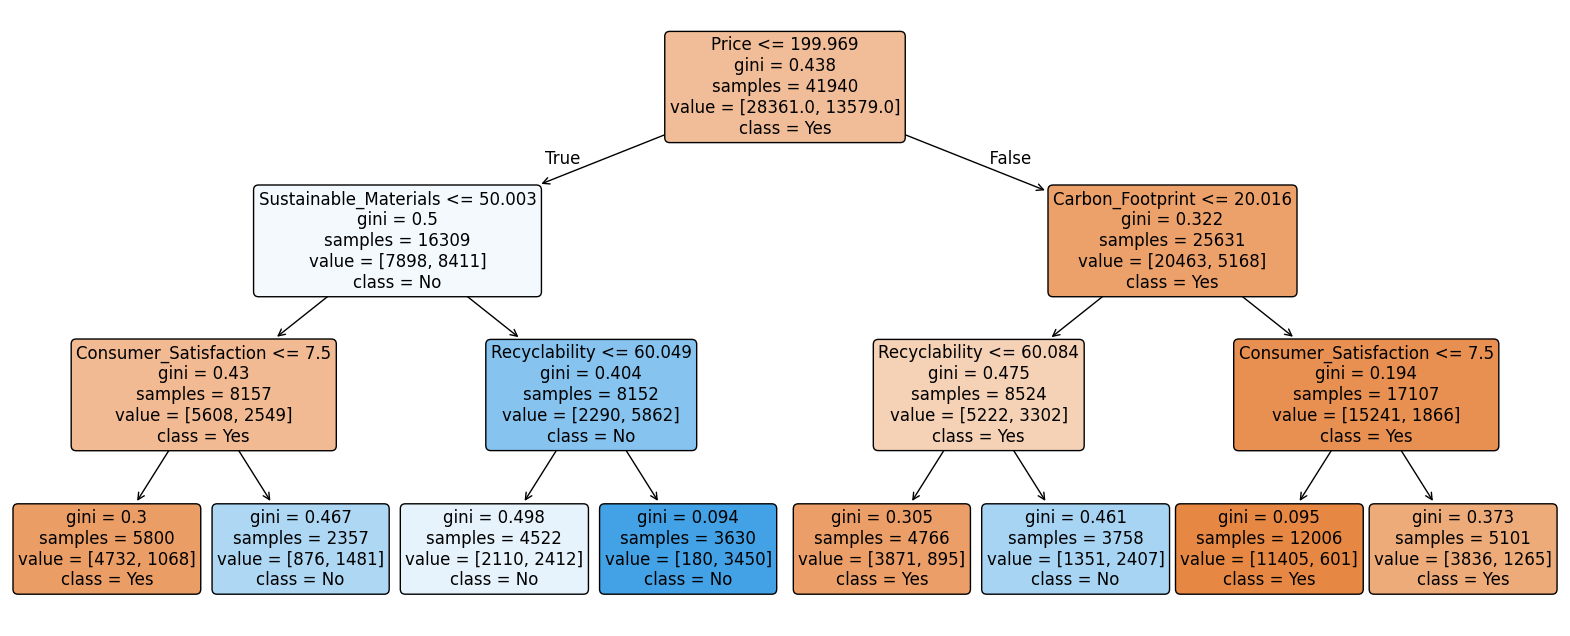

In [25]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,8)) # Görselin boyutunu ayarlar
plot_tree(tree_clf, 
          feature_names=X_train.columns,  # Özellik isimleri
          class_names=["Yes", "No"], # Hedef değişken isimleri
          filled=True, # Dalları renklendirir
          rounded=True, # Kutuların köşelerini yuvarlar
          fontsize=12)
plt.show()


In [46]:
from sklearn.metrics import accuracy_score, classification_report

y_test_pred = tree_clf.predict(X_test) # train veri seti ile eğitilmiş modelimiz train veri seti y tahmin değerleri

print("Test_set accuracy score:", accuracy_score(y_test, y_test_pred))

print("Classification Report:\n")
print(classification_report(y_test, y_test_pred))

####### train veri setimiz ile eğitilen modelimizin test veri seti y değerlerini tahmin etme başarısı %80 dir.

Test_set accuracy score: 0.8030519790176442
Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.84      0.85      7106
           1       0.68      0.72      0.70      3379

    accuracy                           0.80     10485
   macro avg       0.77      0.78      0.78     10485
weighted avg       0.81      0.80      0.80     10485



### `Bagging & Pasting` (Decision Tree)

**Modellerimiz paralel bir şekilde, Bagging ve Pastin yöntemleri ile train setin elde edeceğimiz farklı örneklemler üzerinde eğitilecektir.**
**Cross Validation gibi ama burada amaç modeli geliştirebilmektir. Modelin iyiliğini kontrol etmek değil.**

In [27]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500, # toplam 500 tane karar ağacı oluşturulur. Yani 500 tane (500 model için) 100 örneklem çekilir.
    max_samples=100, bootstrap=True, n_jobs=-1) # boostrap=TRUE (bagging), =False (pasting).  Örneklemler rasgele seçilir.

bag_clf.fit(X_train, y_train)
# bagging modellerin sonucunda için en sık görülen tahmini seçer. Yani bir demokrasi söz konusu.

y_pred = bag_clf.predict(X_test) 

In [28]:
accuracy_score(y_test, y_pred) # 500 Decision tree modelin en sık tahminleri baz alınarak, yüzde 87 doğruluk ile tahmin gerçekleştiriliyor. 

0.8680972818311874

In [44]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_test_pred = bag_clf.predict(X_test)
print("Test_set accuracy score:", accuracy_score(y_test, y_test_pred))

print("Classification Report:\n")
print(classification_report(y_test, y_test_pred))


Test_set accuracy score: 0.8680972818311874
Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      7106
           1       0.95      0.63      0.75      3379

    accuracy                           0.87     10485
   macro avg       0.90      0.80      0.83     10485
weighted avg       0.88      0.87      0.86     10485



### `Out_of_Bag` (Decision Tree)

In [30]:
bag_clf_oob = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=500,
    max_samples=1000 ,bootstrap=True, n_jobs=-1, oob_score = True) # max_sample default olarak 1000 sample alınır.

bag_clf_oob.fit(X_train, y_train)
bag_clf_oob.oob_score_ 

0.9479017644253696

boostrap=True için olasılıksal ifade ile Train_set(X_train) içerisinde bagging ile 500 aynı model için rasgele seçilen 1000 örneklem, toplam X_train değerlerinin %63 ü arasında dönüyor. Geri kalan %37 lik out_of_bag ise her model için valid yani test seti gibi kullanılır. Bu sayede ekstra CV yapmaya gerek kalmaz. 

In [ ]:
bag_clf_oob.oob_decision_function_ # 1. satırı görmeyen ağaçların %92 si bu değer 0'dır demiş. Yüzde 0.08 sı 1'dir demiş. 

array([[0.92402464, 0.07597536],
       [0.14867617, 0.85132383],
       [0.9137577 , 0.0862423 ],
       ...,
       [0.87755102, 0.12244898],
       [0.12244898, 0.87755102],
       [0.93265306, 0.06734694]], shape=(41940, 2))

Örneğin 5. satır için; 500 ağaç içerisinden 5. satırı eğitimde kullanmayan (~185 tane) ağaç ayrıldı. Sadece bu 185 ağaca 5. satır soruldu. Eğer bu 185 ağacın 160 tanesi "0", 25 tanesi "1" dediyse; bu olasılıklar toplanıp ortalaması alındı. İşte o ortalamalar oob_decision_function_ matrisine yazıldı.

In [32]:
y_pred = bag_clf_oob.predict(X_test)
accuracy_score(y_pred, y_test)

0.9483071053886505

In [42]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_test_pred = bag_clf_oob.predict(X_test)
print("Test_set accuracy score:", accuracy_score(y_test, y_test_pred))

print("Classification Report:\n")
print(classification_report(y_test, y_test_pred))

Test_set accuracy score: 0.9483071053886505
Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      7106
           1       0.95      0.89      0.92      3379

    accuracy                           0.95     10485
   macro avg       0.95      0.93      0.94     10485
weighted avg       0.95      0.95      0.95     10485



**Modellerin sonucunda en sık görülen tahmini seçer. Bu tahmin de gerçek test veri seti ile test edildi burada.**

### `Ensemble Learning` (Voting Classifier)

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier ## Ensemble yapmamız için gereken kütüphane

log_clf = LogisticRegression()
decision_t = DecisionTreeClassifier(max_depth=3) 
svm_clf = SVC(probability=True) # Bunu yapmamızın öncelikli sebebi SVM modelinin predict değerlerinin olasılıksal olmasını istiyoruz ki ensemble voting model bütün modellerin olasılıksal değer tahminlerinin ortalamasını alabilsin.

voting_clf = VotingClassifier(estimators=[("logistic", log_clf),("Desicion_tree",decision_t),("svm",svm_clf)],
                              voting="soft") # voting="hard" parametresi bütün modellerin değer başına tahminlerindeki sıklığa göre bir prediction oluşturur. voting="soft" ise her modelin 
                                             # değer başına olasılık tahminlerindeki ortalamasına göre oluşturur.
voting_clf.fit(X_train, y_train) 


# VotingClassification yaptığı şey bütün modellerin değer başına tahminlerindeki sıklığa göre bir prediction çıkartmaya yarar.

/home/uynk/Belgeler/Object_Oriented/env2/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,"estimators estimators: list of (str, estimator) tuplesInvoking the ``fit`` method on the ``VotingClassifier`` will fit clonesof those original estimators that will be stored in the class attribute``self.estimators_``. An estimator can be set to ``'drop'`` using:meth:`set_params`... versionchanged:: 0.21 ``'drop'`` is accepted. Using None was deprecated in 0.22 and support was removed in 0.24.","[('logistic', ...), ('Desicion_tree', ...), ...]"
,"voting voting: {'hard', 'soft'}, default='hard'If 'hard', uses predicted class labels for majority rule voting.Else if 'soft', predicts the class label based on the argmax ofthe sums of the predicted probabilities, which is recommended foran ensemble of well-calibrated classifiers.",'soft'
,"weights weights: array-like of shape (n_classifiers,), default=NoneSequence of weights (`float` or `int`) to weight the occurrences ofpredicted class labels (`hard` voting) or class probabilitiesbefore averaging (`soft` voting). Uses uniform weights if `None`.",None
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for ``fit``.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionadded:: 0.18",None
,"flatten_transform flatten_transform: bool, default=TrueAffects shape of transform output only when voting='soft'If voting='soft' and flatten_transform=True, transform method returnsmatrix with shape (n_samples, n_classifiers * n_classes). Ifflatten_transform=False, it returns(n_classifiers, n_samples, n_classes).",True
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting will be printed as itis completed... versionadded:: 0.23",False
,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001


In [38]:
y_pred_ensemble = voting_clf.predict_proba(X_test) 
y_pred_ensemble 

array([[0.78685157, 0.21314843],
       [0.91247761, 0.08752239],
       [0.23728862, 0.76271138],
       ...,
       [0.92197326, 0.07802674],
       [0.90053479, 0.09946521],
       [0.9622344 , 0.0377656 ]], shape=(10485, 2))

In [39]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, decision_t, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred)) 

/home/uynk/Belgeler/Object_Oriented/env2/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression 0.8209823557463043
DecisionTreeClassifier 0.8030519790176442
SVC 0.8163090128755365


/home/uynk/Belgeler/Object_Oriented/env2/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier 0.8451120648545541


In [41]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_test_pred = voting_clf.predict(X_test)
print("Test_set accuracy score:", accuracy_score(y_test, y_test_pred))

print("Classification Report:\n")
print(classification_report(y_test, y_test_pred))


Test_set accuracy score: 0.8451120648545541
Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      7106
           1       0.82      0.66      0.73      3379

    accuracy                           0.85     10485
   macro avg       0.84      0.80      0.81     10485
weighted avg       0.84      0.85      0.84     10485



**İlk oluşturduğum Decision tree modeline göre bu Decision tree modelinin farklı çıkmasının sebebi max_depth gib hiperparametreleri belirtmedim.Dolayısıyla veriyi biraz ezberlemiş olabilir.**

### `Random Forest `

In [47]:
from sklearn.ensemble import RandomForestClassifier

Random_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
Random_clf.fit(X_train, y_train)

y_pred_Random = Random_clf.predict(X_test)

In [48]:
accuracy_score(y_pred_Random, y_test) 

0.7858845970433953

### `Roc_Curve`

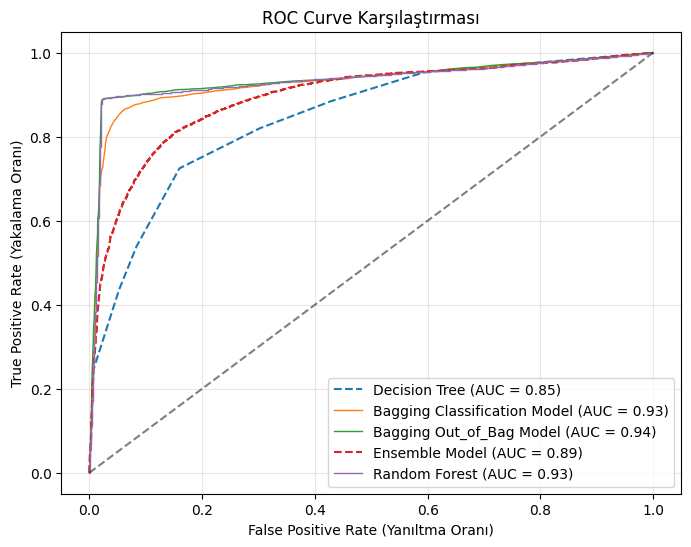

In [51]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Decision Tree için olasılıklar
y_probs_tree = tree_clf.predict_proba(X_test)[:, 1] # Sadece '1' olma olasılığını alıyoruz

# Bagging classification olasılıklar
y_probs_bag = bag_clf.predict_proba(X_test)[:, 1]

# Bagging_Out_of_bag classification olasılıklar
y_probs_bag_oob = bag_clf_oob.predict_proba(X_test)[:, 1]

# Ensemble Classification olasılıklar
y_probs_ensemble = voting_clf.predict_proba(X_test)[:,1]

# Random Forest için olasılıklar
y_probs_Random = Random_clf.predict_proba(X_test)[:, 1] 


# ROC Değerlerini Hesapla
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_probs_tree) # fpr, False Positive Rate. tpr, True Positive Rate
fpr_bag, tpr_bag, _ = roc_curve(y_test, y_probs_bag)
fpr_bag_oob, tpr_bag_oob, _ = roc_curve(y_test, y_probs_bag_oob)
fpr_ensemble, tpr_ensemble, _ = roc_curve(y_test, y_probs_ensemble)
fpr_Random, tpr_Random, _ = roc_curve(y_test, y_probs_Random)


# AUC Skorlarını Hesapla (Grafikte göstermek için)
auc_tree = roc_auc_score(y_test, y_probs_tree)
auc_Bag = roc_auc_score(y_test, y_probs_bag)
auc_Bag_oob = roc_auc_score(y_test, y_probs_bag_oob)
auc_Ensemble = roc_auc_score(y_test, y_probs_ensemble)
auc_rnd = roc_auc_score(y_test, y_probs_Random)


# Çizim
plt.figure(figsize=(8, 6))
plt.plot(fpr_tree, tpr_tree, label=f"Decision Tree (AUC = {auc_tree:.2f})", linestyle="--")
plt.plot(fpr_bag, tpr_bag, label=f"Bagging Classification Model (AUC = {auc_Bag:.2f})", linewidth=1)
plt.plot(fpr_bag_oob, tpr_bag_oob, label=f"Bagging Out_of_Bag Model (AUC = {auc_Bag_oob:.2f})", linewidth=1)
plt.plot(fpr_ensemble, tpr_ensemble, label=f"Ensemble Model (AUC = {auc_Ensemble:.2f})", linestyle='--')
plt.plot(fpr_Random, tpr_Random, label=f"Random Forest (AUC = {auc_rnd:.2f})", linewidth=1)


plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)

plt.xlabel('False Positive Rate (Yanıltma Oranı)')
plt.ylabel('True Positive Rate (Yakalama Oranı)')
plt.title('ROC Curve Karşılaştırması')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()



### `Wide & Deep Model`

#### `Kategorik değişkenlerde 3'lü kombinasyon şeklinde en çok tekrar eden değerleri içeren değişkenler`

In [52]:
from itertools import combinations

Combination_list = list(combinations(new_data_obj, 3))


results = []

for grup in Combination_list:
    most_freq = data[list(grup)].value_counts().idxmax()
    most_freq_val = data[list(grup)].value_counts().max()
    
    results.append({"Grup": grup,
                    "most_freq": most_freq,
                    "most_freq_val": most_freq_val})

analysis_table3 = pd.DataFrame(results)
analysis_table3.sort_values(by="most_freq_val", ascending=False).head()

,Grup,most_freq,most_freq_val
0,"(Category, Material_Type, Manufacturing_Process)","(Food, Organic, Recycled)",8964
119,"(Material_Type, Biodegradability, Is_Optimum)","(Organic, 1, No)",8480
185,"(Manufacturing_Process, Biodegradability, Is_O...","(Assembly Line, 0, No)",7986
20,"(Category, Manufacturing_Process, Is_Optimum)","(Electronics, Assembly Line, No)",6160
98,"(Material_Type, Manufacturing_Process, Is_Opti...","(Organic, Hand-made, No)",6071


#### `Kategorik değişkenlerde 2'li kombinasyon şeklinde en çok tekrar eden değerleri içeren değişkenler`

In [53]:
from itertools import combinations

Combination_list = list(combinations(new_data_obj, 2))


results = []

for grup in Combination_list:
    most_freq = data[list(grup)].value_counts().idxmax()
    most_freq_val = data[list(grup)].value_counts().max()
    
    results.append({"Grup": grup,
                    "most_freq": most_freq,
                    "most_freq_val": most_freq_val})

analysis_table2 = pd.DataFrame(results)
analysis_table2.sort_values(by="most_freq_val", ascending=False)[:7] # En çok tekrar eden değişkenler (Biodegradability, Is_Optimum)
                                                                       # Tekrar değeri ise 52425 gözlem içerisinde 17735. 
                                                                       # Fakat burada seçilmesi gereken Material_Type ve Biodegradability değişkenleridir. 

,Grup,most_freq,most_freq_val
55,"(Biodegradability, Is_Optimum)","(1, No)",17735
22,"(Material_Type, Is_Optimum)","(Organic, No)",16914
34,"(Manufacturing_Process, Is_Optimum)","(Assembly Line, No)",15928
16,"(Material_Type, Biodegradability)","(Organic, 1)",12592
98,"(Is_Optimum, Competitor_Benchmark)","(No, Better)",11986
95,"(Is_Optimum, Market_Demand)","(No, Medium)",11877
28,"(Manufacturing_Process, Biodegradability)","(Assembly Line, 0)",11828


In [54]:
Wide_Deep_data = Encoded_data.copy()

Wide_Deep_data_num = Wide_Deep_data.select_dtypes(include="float")
Wide_Deep_data_obj = Wide_Deep_data.select_dtypes(exclude="float") 

In [55]:
display(Wide_Deep_data_obj["Material_Type_Organic"][0:5])
Wide_Deep_data_obj["Biodegradability"][0:5]

0    0
1    0
2    1
3    1
4    1
Name: Material_Type_Organic, dtype: int64

0    1
1    1
2    1
3    1
4    0
Name: Biodegradability, dtype: category
Categories (2, int64): [0, 1]

Veri setimizdeki en çok tekrar eden değişken değerlerimiz "Material_Type_Organic" ve "Biodegradability" bu değişkenleri modelimizin Wide kısmında kullanabiliriz.

In [56]:
12592/len(new_data) # Material Tipi Organic olan ve Biyobozunurluğu 1 olan ürünler tüm ürünlerin %24 ünü oluşturuyor. Bu da modelin wide kısmında kullanılmaya aday.

0.24019074868860277

**`Wide and Deep Datasets`**

In [57]:
wide_features = Wide_Deep_data[["Material_Type_Organic", "Biodegradability"]].values
deep_features = Wide_Deep_data.drop(columns=["Material_Type_Organic", "Biodegradability", "Is_Optimum"]).values 
y_target = Wide_Deep_data["Is_Optimum"].values 
y_target_2d = y_target.reshape(-1,1) # Bunu yapmamızın sebebi wide_features, deep_features verileri ile aynı dimention a sahip olması için yaptım.


(X_train_wide, X_test_wide, 
 X_train_deep, X_test_deep, 
 y_train_wd, y_test_wd) = train_test_split(
    wide_features, deep_features, y_target_2d, 
    test_size=0.20, 
    random_state=42,
    stratify=y_target # Sınıf dengesini korumak için çok kritik!
) 

In [58]:
y_target_2d.shape 

(52425, 1)

In [59]:
col_wide_features = wide_features.shape[1] 
col_deep_features = deep_features.shape[1]
y_target_2d_features = y_target_2d.shape[1]

col_wide_features, col_deep_features, y_target_2d_features 

(2, 34, 1)

### `Wide and Deep Model` (Making Model)

In [60]:
import keras
from tensorflow.keras import Input, layers, Model

Input_wide = keras.layers.Input(shape=(col_wide_features,), name="wide_Input")
Input_deep = keras.layers.Input(shape=(col_deep_features,), name="deep_Input") 
hidden1 = keras.layers.Dense(30, activation="relu")(Input_deep)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([Input_wide, hidden2])
output = keras.layers.Dense(1, activation="sigmoid", name="output")(concat)

model = keras.Model(inputs=[Input_wide, Input_deep], outputs=[output]) 

2026-02-27 01:31:30.552885: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2026-02-27 01:31:30.605416: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-02-27 01:31:32.217191: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-02-27 01:31:35.416599: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To tur

#### **Building Optimizer,loss,metrics that we maked model**

In [61]:
from tensorflow import optimizers
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

model.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1e-3), metrics=["accuracy", 
                                                                                                       keras.metrics.Precision(name='precision'),
                                                                                                       keras.metrics.Recall(name='recall'),
                                                                                                       keras.metrics.F1Score(name='F1')]) 


In [64]:
history = model.fit((X_train_wide, X_train_deep), y_train_wd, epochs=6) 

Epoch 1/6
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - F1: 0.4888 - accuracy: 0.8183 - loss: 0.4151 - precision: 0.7473 - recall: 0.6619
Epoch 2/6
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - F1: 0.4888 - accuracy: 0.8190 - loss: 0.4146 - precision: 0.7493 - recall: 0.6619
Epoch 3/6
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - F1: 0.4888 - accuracy: 0.8186 - loss: 0.4134 - precision: 0.7491 - recall: 0.6605
Epoch 4/6
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - F1: 0.4888 - accuracy: 0.8206 - loss: 0.4116 - precision: 0.7515 - recall: 0.6656
Epoch 5/6
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - F1: 0.4888 - accuracy: 0.8193 - loss: 0.4122 - precision: 0.7495 - recall: 0.6629
Epoch 6/6
1311/1311 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - F1: 0.4888 - accuracy: 0.8202 - loss: 0.4099 - precision: 0.7509 - recall: 0.6645


In [65]:
wide_deep_pred_test = history.model.predict((X_test_wide, X_test_deep))
display(wide_deep_pred_test.shape)
display(y_test_wd.shape)

328/328 ━━━━━━━━━━━━━━━━━━━━ 0s 880us/step


(10485, 1)

(10485, 1)

In [66]:
history.model.predict((X_test_wide, X_test_deep))

328/328 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step


array([[0.3347657 ],
       [0.42412427],
       [0.04779667],
       ...,
       [0.45796797],
       [0.08202988],
       [0.97877187]], shape=(10485, 1), dtype=float32)

328/328 ━━━━━━━━━━━━━━━━━━━━ 0s 797us/step


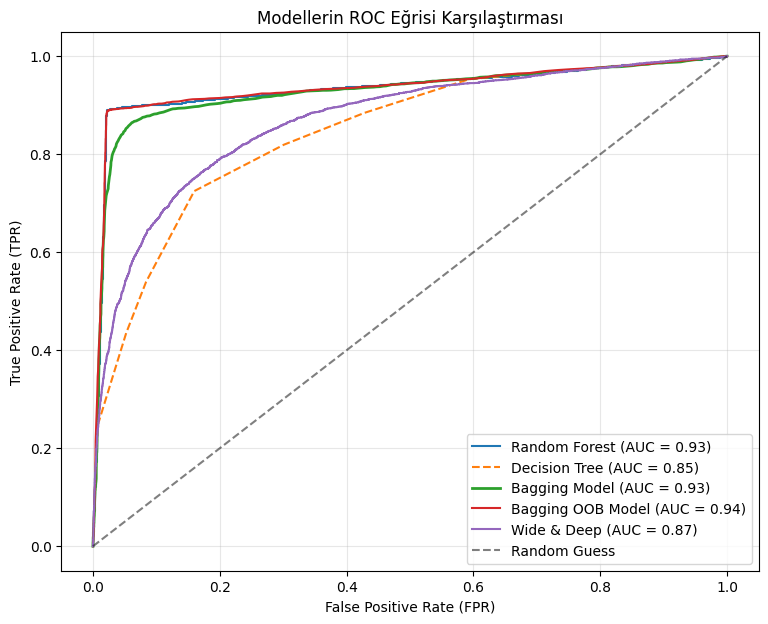

In [67]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Random Forest için olasılıklar
y_probs_Random = Random_clf.predict_proba(X_test)[:, 1] # Sadece '1' olma olasılığını alıyoruz

# Decision Tree için olasılıklar
y_probs_tree = tree_clf.predict_proba(X_test)[:, 1]

# Bagging classification olasılıklar
y_probs_bag = bag_clf.predict_proba(X_test)[:, 1]

# Bagging_Out_of_bag classification olasılıklar
y_probs_bag_oob = bag_clf_oob.predict_proba(X_test)[:, 1]

# Wide and Deep Model
y_probs_wide_deep = history.model.predict((X_test_wide, X_test_deep))


# ROC Değerlerini Hesapla
fpr_Random, tpr_Random, _ = roc_curve(y_test, y_probs_Random) # fpr, False Positive Rate. tpr, True Positive Rate
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_probs_tree)
fpr_bag, tpr_bag, _ = roc_curve(y_test, y_probs_bag)
fpr_bag_oob, tpr_bag_oob, _ = roc_curve(y_test, y_probs_bag_oob)
fpr_bag_wide_deep, tpr_bag_wide_deep, _ = roc_curve(y_test_wd, y_probs_wide_deep)


# 1. AUC Skorlarını Doğru Değişkenlerle Hesapla
auc_rnd = roc_auc_score(y_test, y_probs_Random)
auc_tree = roc_auc_score(y_test, y_probs_tree)
auc_bag = roc_auc_score(y_test, y_probs_bag)
auc_bag_oob = roc_auc_score(y_test, y_probs_bag_oob)
auc_wd = roc_auc_score(y_test_wd, y_probs_wide_deep) # Wide & Deep eklendi

# 2. Çizim Kısmındaki Label Eşleşmelerini Düzelt
plt.figure(figsize=(9, 7))

plt.plot(fpr_Random, tpr_Random, label=f"Random Forest (AUC = {auc_rnd:.2f})")
plt.plot(fpr_tree, tpr_tree, label=f"Decision Tree (AUC = {auc_tree:.2f})", linestyle='--')
plt.plot(fpr_bag, tpr_bag, label=f"Bagging Model (AUC = {auc_bag:.2f})", linewidth=2) # auc_bag kullanıldı
plt.plot(fpr_bag_oob, tpr_bag_oob, label=f"Bagging OOB Model (AUC = {auc_bag_oob:.2f})") # auc_bag_oob kullanıldı
plt.plot(fpr_bag_wide_deep, tpr_bag_wide_deep, label=f"Wide & Deep (AUC = {auc_wd:.2f})") # auc_wd kullanıldı

# Referans çizgi
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5, label="Random Guess")

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Modellerin ROC Eğrisi Karşılaştırması')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


In [68]:
history.history

{'F1': [0.4888119697570801,
  0.4888119697570801,
  0.4888119697570801,
  0.4888119697570801,
  0.4888119697570801,
  0.4888119697570801],
 'accuracy': [0.8182641863822937,
  0.8190271854400635,
  0.818621814250946,
  0.8206247091293335,
  0.8192894458770752,
  0.8201716542243958],
 'loss': [0.4150945246219635,
  0.4145655930042267,
  0.41335850954055786,
  0.411598801612854,
  0.41219520568847656,
  0.4099489748477936],
 'precision': [0.7473368644714355,
  0.7493324279785156,
  0.7491012215614319,
  0.7514773011207581,
  0.7494791150093079,
  0.7509163618087769],
 'recall': [0.6619489789009094,
  0.6619489789009094,
  0.6604747176170349,
  0.6655609607696533,
  0.6629072427749634,
  0.664455235004425]}